In [5]:
import pytc
%matplotlib inline

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display


class Interface:
    
    def __init__(self,fitter):
        """
        """
        
        self._sliders = {}
        self._fitter = fitter
        self._build_interface()
        
    def _build_interface(self):
        """
        """
    
        for p in self._fitter.param_names:
            
            
            g = abs(self._fitter._param_guesses[p])
            
            if g == 0:
                g_min = -1
                g_max = 1
                g_step = 1/100
            else:
                g_min = -g
                g_max = g
                g_step = 2*abs(g)/100
            
            self._sliders[p] = widgets.FloatSlider(min=g_min,max=g_max,step=g_step,value=g)
            
        w = widgets.interactive(self._update,**self._sliders)
                        
        display(w)
        
        btn = widgets.Button(description="Show Fit")
        btn.on_click(lambda x: self.get_param())
        display(btn)

    def _update(self,**kwargs):
        """
        """
   
        self._fitter.update_guesses(kwargs)
        self._fitter.fit()
        self._fitter.plot()
        print(self._fitter.fit_param)
        
    def get_param(self):
        
        print(self._fitter.fit_param)
        
       

{'dilution_heat': -3025.7919868421586, 'fx_competent': 1.077187057687548, 'K': 11189.805874943406, 'dH': -5972.1108455343101, 'dilution_intercept': 1.0529340669225418}


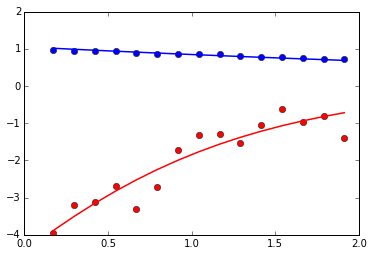

In [6]:
f = pytc.GlobalFit({"K":1e6,
                    "dH":-4000,
                    "fx_competent":1.0,
                    "dilution_heat":0.0,
                    "dilution_intercept":0.0})

e1 = pytc.ITCExperiment("test-data/blank.DH",pytc.models.Blank)
f.add_experiment(e1)

e2 = pytc.ITCExperiment("test-data/real-blank-match.DH",pytc.models.SingleSite)
f.add_experiment(e2)




another_wrapper = Interface(f)